<a href="https://colab.research.google.com/github/Dohy-Lee/ML_DL.Basic/blob/main/3_3)Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#선형 회귀는 특성이 많으면 많을수록 좋음
#다중 회귀 : 여려 개의 특성을 사용한 선형 회귀
#특성 공학 : 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
import pandas as pd #판다스
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [ ]:
#사이킷 런에서의 변환기 : 특성을 만들거나 전처리하기 위한 클래스
#LinearRegression 같은 모델 클래스는 '추정기'
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
poly.fit([[2,3]]) #훈련을 해야 변환이 가능
print(poly.transform([[2,3]])) #1은 디폴트로 항상 존재

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
#그러나 사이킷런의 선형모델은 자동으로 절편을 추가함으로 1을 빼줘도 됨
poly = PolynomialFeatures(include_bias= False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
#Q)왜 특성이 9개? --> PolynomialFeatures 클래스의 get_feature_names() 메서드 호출하여 확인
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
#x0 : 첫 번째 특성, x1 : 두 번째 특성 x2 : 세 번째 특성
test_poly = poly.transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [ ]:
poly = PolynomialFeatures(degree = 5 , include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


In [ ]:
#특성의 개수를 크게 늘림 -> 선형 모델은 아주 좋아짐 그러나 훈련세트에 한해서 거의 완벽하게 학습-> 훈련세트에 한해서 과대적합
#규제(Regularizaion) : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것. 선형 회귀 모델의 경우 특성에 곱해지는 기울기(= 계수)의 크기를 작게 만드는 일
#특성의 스케일이 정규화 되지않음 -> 선형 회귀 모델에 규제를 적용할때 계수의 값의 크기가 서로 많이 다르면 공정하게 제어되지 않음 -> 정규화의 과정이 필요함
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
#선형 회귀 모델에 규제를 추가한 모델 : 릿지(Ridge), 라쏘(Lasso)
#릿지(Ridge) : 계수를 제곱한 값을 기준으로 규제를 적용, 일반적으로 릿지를 좀 더 선호
#라쏘(Lasso) : 계수의 절댓값을 기준으로 규제를 적용, 계수의크기를 0으로 만들수 있음
#alpha 매개변수로 규제의 정도를 조절 : alpha값이 크다 -> 규제강도가 세지므로, 계수 값을 더 중리고 과소적합되도록 유도
#                                      alpha값이 작다 -> 규제강도가 약해지므로, 계수 값을 줄이는 역할이 줄어들고, 선형 회귀 모델과 유사해지므로 과대적합되도록 유도

In [ ]:
#릿지 호귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


In [ ]:
#적절한 alpha값을 찾는 한가지 방법 : alpha값에 대한 R^2 그래프 그리기 -> 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값
import matplotlib.pyplot as plt
train_score = []
test_score = []

ValueError: ignored

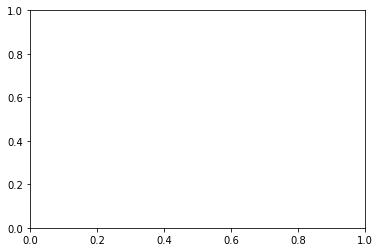

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np,log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()